In [1]:
suppressMessages(library(Seurat))
suppressMessages(library(ggplot2))
suppressMessages(library(patchwork))
suppressMessages(library(dplyr))
suppressMessages(library(viridis))
suppressMessages(library(cowplot))
suppressMessages(library(anndataR))
suppressMessages(library(ComplexHeatmap))
library(abind)

In [2]:
in_dir <- "../../results/05_fibroblast/06_cell_state_score"
out_dir <- "../../results/05_fibroblast/07_co_localization"

if(!dir.exists(out_dir)){
    dir.create(out_dir, recursive = TRUE)
}

In [3]:
sample_list <- c('HC01', 'HC02', 'HC03', 'HC05',
                 'SSc4994', 
                 'SSc5380', 
               'SSc-HL01', 'SSc-HL05', 'SSc-HL06', 'SSc-HL11',
               'SSc-HL13', 'SSc-HL25', 'SSc-HL33', 'SSc-HL35')

In [4]:
for(sample in sample_list){
    obj <- readRDS(glue::glue("{in_dir}/{sample}.rds"))
    
    df1 <- obj@meta.data %>%
            subset(select = c('B.cells', 'Endothelial', 'Keratinocytes', 'Melanocytes', 'Langerhans.cells', 'Macrophages', 
                              'Mast.cells', 'Monocytes', 'NK.cells', 'Neural', 'Pericytes',
                              'Plasma.cells', 'Smooth.Muscle', 'T.cells', 'cDC', 'pDC'))

    df2 <- obj@meta.data %>%
            subset(select = c('Fib1', 'Fib10', 'Fib2', 'Fib3', 'Fib4', 'Fib5', 'Fib6', 'Fib7', 'Fib8', 'Fib9'))
    
    df_cor <- as.data.frame(cor(df2, df1, method="spearman"))
    
    write.csv(df_cor, glue::glue("{out_dir}/{sample}.csv"))
}

In [25]:
df_cor <- lapply(sample_list, function(sample){
    df_cor = read.csv(glue::glue("{out_dir}/{sample}.csv"), row.names = 1)
    
    # read all samples
    df_cor <- df_cor %>%
        tibble::rownames_to_column(var = "fib") %>%
        tidyr::pivot_longer(cols = -fib, names_to = "cell_type", values_to = "correlation")
    
    df_cor$sample <- sample
    
    return(df_cor)
}) %>% do.call(rbind, .)

In [26]:
write.csv(df_cor, glue::glue("{out_dir}/all_cor.csv"))

In [5]:
df_cor_list <- lapply(sample_list, function(sample){
    df_cor = read.csv(glue::glue("{out_dir}/{sample}.csv"), row.names = 1)
    return(df_cor)
})

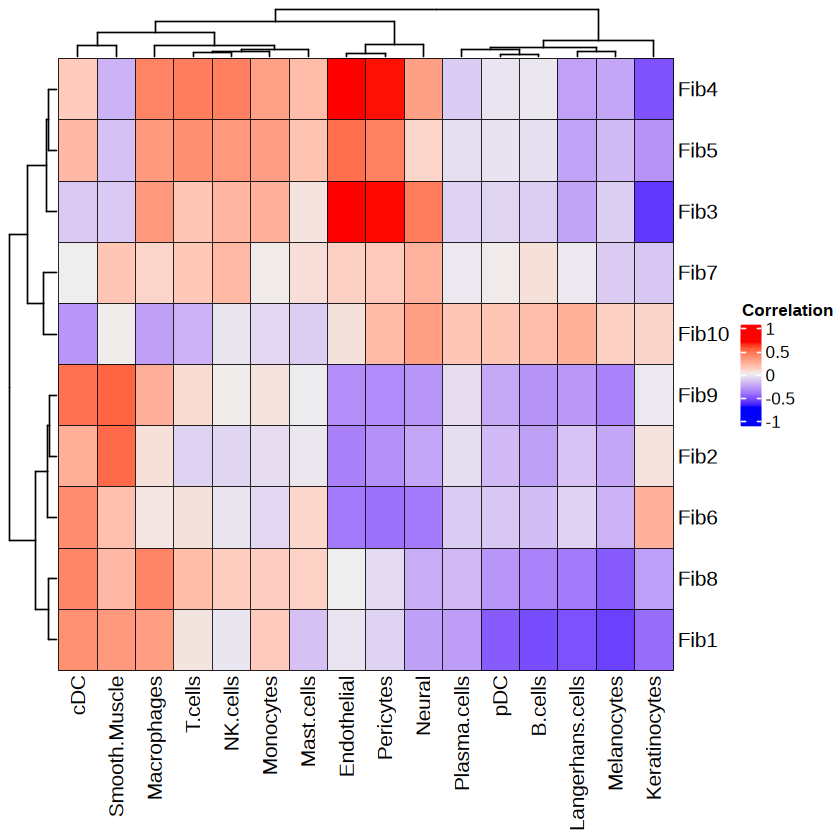

In [6]:
for(i in 1:length(df_cor_list)){
    
    mat <- df_cor_list[[i]]
    
    ht <- Heatmap(as.matrix(mat),
              name = 'Correlation',
              rect_gp = gpar(col = "black", lwd = 0.5),
              cluster_columns = TRUE,
              cluster_rows = TRUE,
              clustering_method_rows = 'ward.D2',
              clustering_method_columns = 'ward.D2')

    draw(ht)
}

In [7]:
array_3d <- abind(lapply(df_cor_list, function(df) as.matrix(df)), along = 3)
mean_matrix <- apply(array_3d, c(1, 2), mean)

In [8]:
mean_matrix

,B.cells,Endothelial,Keratinocytes,Melanocytes,Langerhans.cells,Macrophages,Mast.cells,Monocytes,NK.cells,Neural,Pericytes,Plasma.cells,Smooth.Muscle,T.cells,cDC,pDC
Fib1,-0.434665888,0.20172932,-0.53648743,-0.45062628,-0.43913389,0.40099285,0.16879168,0.040965032,0.15726940,0.06385211,0.16652095,-0.26140295,0.336561044,0.22327707,0.2691737,-0.340165085
Fib10,0.114881292,0.12403351,0.03866243,0.05904863,0.13254808,-0.16528104,-0.09652368,-0.060645470,-0.08593274,0.19983979,0.18203567,0.14251070,0.091542412,-0.11649087,-0.1890475,0.088018280
Fib2,-0.209651681,-0.03122659,-0.18556381,-0.18273178,-0.18194009,0.16850282,0.12028198,-0.030618938,0.06798976,0.03839376,0.01742486,-0.08606109,0.257323721,0.09075615,0.1514951,-0.133123942
Fib3,-0.326605925,0.66594175,-0.71431094,-0.40033257,-0.40823725,0.48136381,0.24868529,0.112367585,0.32026038,0.35055316,0.63988127,-0.16613631,0.365247457,0.38118053,0.2698775,-0.253346278
Fib4,-0.223253209,0.71783080,-0.62495933,-0.36764672,-0.34694597,0.51499416,0.31197039,0.181264253,0.44009696,0.32065932,0.70922890,-0.15659655,0.287504106,0.51669479,0.4287928,-0.177662263
Fib5,-0.007204172,0.35453087,-0.19013521,-0.10638804,-0.08748916,0.19377115,0.08676043,0.123746171,0.20185799,0.10535987,0.37885331,0.02795913,0.001249385,0.19717228,0.1562047,-0.007762804
Fib6,-0.069543079,-0.12711736,0.09998686,0.01960477,-0.02033766,0.09375848,0.13984249,-0.008860614,0.04354106,-0.08868212,-0.09707701,-0.09830433,0.025983986,0.07810786,0.2051223,-0.014336203
Fib7,-0.032060296,0.21327291,-0.16049569,-0.07326373,-0.06048122,0.16153100,0.17097794,-0.012906479,0.15191054,0.20378098,0.21318402,0.00536247,0.202201178,0.17758668,0.1265204,-0.011807494
Fib8,-0.384578896,0.19449092,-0.46165929,-0.38481843,-0.39222830,0.43626721,0.26642857,0.046728975,0.21484260,0.05702875,0.19065159,-0.25357271,0.261444719,0.27694606,0.3404884,-0.291159853
Fib9,-0.281052068,0.08107078,-0.29572067,-0.26912151,-0.29030232,0.28427304,0.15260984,0.034424343,0.15849046,0.05262012,0.06301198,-0.08728693,0.310911882,0.20356491,0.2906011,-0.202656538


In [9]:
options(repr.plot.height = 5, repr.plot.width = 6)

ht <- Heatmap(as.matrix(mean_matrix),
              name = 'Correlation',
              rect_gp = gpar(col = "black", lwd = 0.5),
              cluster_columns = TRUE,
              cluster_rows = TRUE,
              clustering_method_rows = 'ward.D2',
              clustering_method_columns = 'ward.D2')

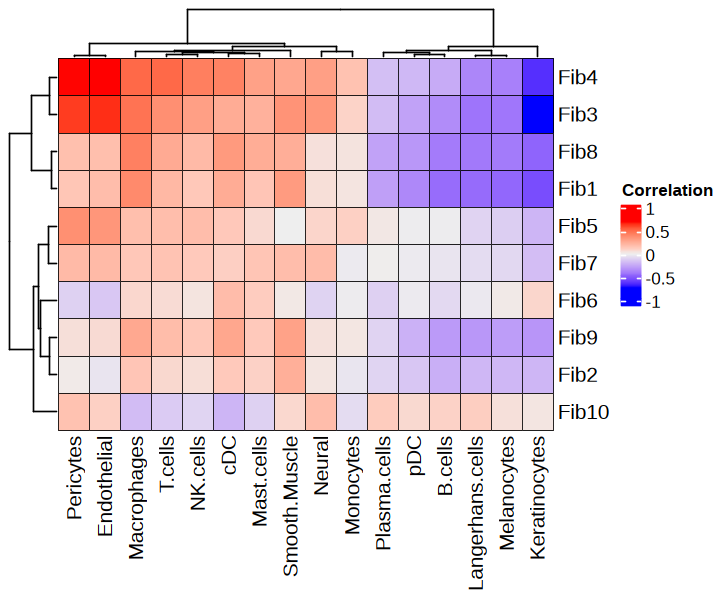

In [10]:
draw(ht)

In [11]:
mean_matrix

,B.cells,Endothelial,Keratinocytes,Melanocytes,Langerhans.cells,Macrophages,Mast.cells,Monocytes,NK.cells,Neural,Pericytes,Plasma.cells,Smooth.Muscle,T.cells,cDC,pDC
Fib1,-0.434665888,0.20172932,-0.53648743,-0.45062628,-0.43913389,0.40099285,0.16879168,0.040965032,0.15726940,0.06385211,0.16652095,-0.26140295,0.336561044,0.22327707,0.2691737,-0.340165085
Fib10,0.114881292,0.12403351,0.03866243,0.05904863,0.13254808,-0.16528104,-0.09652368,-0.060645470,-0.08593274,0.19983979,0.18203567,0.14251070,0.091542412,-0.11649087,-0.1890475,0.088018280
Fib2,-0.209651681,-0.03122659,-0.18556381,-0.18273178,-0.18194009,0.16850282,0.12028198,-0.030618938,0.06798976,0.03839376,0.01742486,-0.08606109,0.257323721,0.09075615,0.1514951,-0.133123942
Fib3,-0.326605925,0.66594175,-0.71431094,-0.40033257,-0.40823725,0.48136381,0.24868529,0.112367585,0.32026038,0.35055316,0.63988127,-0.16613631,0.365247457,0.38118053,0.2698775,-0.253346278
Fib4,-0.223253209,0.71783080,-0.62495933,-0.36764672,-0.34694597,0.51499416,0.31197039,0.181264253,0.44009696,0.32065932,0.70922890,-0.15659655,0.287504106,0.51669479,0.4287928,-0.177662263
Fib5,-0.007204172,0.35453087,-0.19013521,-0.10638804,-0.08748916,0.19377115,0.08676043,0.123746171,0.20185799,0.10535987,0.37885331,0.02795913,0.001249385,0.19717228,0.1562047,-0.007762804
Fib6,-0.069543079,-0.12711736,0.09998686,0.01960477,-0.02033766,0.09375848,0.13984249,-0.008860614,0.04354106,-0.08868212,-0.09707701,-0.09830433,0.025983986,0.07810786,0.2051223,-0.014336203
Fib7,-0.032060296,0.21327291,-0.16049569,-0.07326373,-0.06048122,0.16153100,0.17097794,-0.012906479,0.15191054,0.20378098,0.21318402,0.00536247,0.202201178,0.17758668,0.1265204,-0.011807494
Fib8,-0.384578896,0.19449092,-0.46165929,-0.38481843,-0.39222830,0.43626721,0.26642857,0.046728975,0.21484260,0.05702875,0.19065159,-0.25357271,0.261444719,0.27694606,0.3404884,-0.291159853
Fib9,-0.281052068,0.08107078,-0.29572067,-0.26912151,-0.29030232,0.28427304,0.15260984,0.034424343,0.15849046,0.05262012,0.06301198,-0.08728693,0.310911882,0.20356491,0.2906011,-0.202656538


In [12]:
write.csv(mean_matrix, glue::glue("{out_dir}/co_localization.csv"))